<a href="https://colab.research.google.com/github/stevengregori92/Web-Scraping-with-LassoCV/blob/main/Web_Scraping_with_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

#Web Scraping

In [ ]:
years = [2020, 2021, 2022]
link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
  url = link.format(year)
  print(url)

https://www.basketball-reference.com/leagues/NBA_2020_per_game.html
https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
https://www.basketball-reference.com/leagues/NBA_2022_per_game.html


In [ ]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'

In [ ]:
data = pd.read_html(url, header = 0)
data

[      Rk             Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  \
 0      1   Precious Achiuwa   C  22  TOR  73  28  23.6  3.6   8.3  ...  .595   
 1      2       Steven Adams   C  28  MEM  76  75  26.3  2.8   5.1  ...  .543   
 2      3        Bam Adebayo   C  24  MIA  56  56  32.6  7.3  13.0  ...  .753   
 3      4       Santi Aldama  PF  21  MEM  32   0  11.3  1.7   4.1  ...  .625   
 4      5  LaMarcus Aldridge   C  36  BRK  47  12  22.3  5.4   9.7  ...  .873   
 ..   ...                ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...   
 837  601     Thaddeus Young  PF  33  TOR  26   0  18.3  2.6   5.5  ...  .481   
 838  602         Trae Young  PG  23  ATL  76  76  34.9  9.4  20.3  ...  .904   
 839  603     Omer Yurtseven   C  23  MIA  56  12  12.6  2.3   4.4  ...  .623   
 840  604        Cody Zeller   C  29  POR  27   0  13.1  1.9   3.3  ...  .776   
 841  605        Ivica Zubac   C  24  LAC  76  76  24.4  4.1   6.5  ...  .727   
 
      ORB  DRB   TRB  AST 

In [ ]:
data[0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


#Cleaning Data

In [ ]:
dataset = data[0]

In [ ]:
dataset[dataset.Age == 'Age']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
26,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
74,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
103,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
157,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
184,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
212,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
249,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
272,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [ ]:
for col in dataset.columns:
    dataset = dataset.drop(dataset[dataset[col] == col].index)

In [ ]:
len(dataset)

812

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 841
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      812 non-null    object
 1   Player  812 non-null    object
 2   Pos     812 non-null    object
 3   Age     812 non-null    object
 4   Tm      812 non-null    object
 5   G       812 non-null    object
 6   GS      812 non-null    object
 7   MP      812 non-null    object
 8   FG      812 non-null    object
 9   FGA     812 non-null    object
 10  FG%     797 non-null    object
 11  3P      812 non-null    object
 12  3PA     812 non-null    object
 13  3P%     740 non-null    object
 14  2P      812 non-null    object
 15  2PA     812 non-null    object
 16  2P%     784 non-null    object
 17  eFG%    797 non-null    object
 18  FT      812 non-null    object
 19  FTA     812 non-null    object
 20  FT%     715 non-null    object
 21  ORB     812 non-null    object
 22  DRB     812 non-null    ob

In [ ]:
dataset = dataset.drop(['Player', 'Pos', 'Tm'], axis = 1)

In [ ]:
for col in dataset.columns:
        # Use try-except to catch any errors that occur when converting the data type
        try:
            dataset[col] = dataset[col].astype(float)
        except ValueError:
            # If the data type cannot be converted to int, print an error message
            print(f"Unable to convert {col} to int")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 841
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    float64
 1   Age     812 non-null    float64
 2   G       812 non-null    float64
 3   GS      812 non-null    float64
 4   MP      812 non-null    float64
 5   FG      812 non-null    float64
 6   FGA     812 non-null    float64
 7   FG%     797 non-null    float64
 8   3P      812 non-null    float64
 9   3PA     812 non-null    float64
 10  3P%     740 non-null    float64
 11  2P      812 non-null    float64
 12  2PA     812 non-null    float64
 13  2P%     784 non-null    float64
 14  eFG%    797 non-null    float64
 15  FT      812 non-null    float64
 16  FTA     812 non-null    float64
 17  FT%     715 non-null    float64
 18  ORB     812 non-null    float64
 19  DRB     812 non-null    float64
 20  TRB     812 non-null    float64
 21  AST     812 non-null    float64
 22  ST

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

Rk      0
Age     0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64

In [ ]:
dataset

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,22.0,73.0,28.0,23.6,3.6,8.3,0.439,0.8,2.1,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2.0,28.0,76.0,75.0,26.3,2.8,5.1,0.547,0.0,0.0,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3.0,24.0,56.0,56.0,32.6,7.3,13.0,0.557,0.0,0.1,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4.0,21.0,32.0,0.0,11.3,1.7,4.1,0.402,0.2,1.5,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5.0,36.0,47.0,12.0,22.3,5.4,9.7,0.550,0.3,1.0,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,601.0,33.0,26.0,1.0,14.2,2.8,4.9,0.578,0.0,0.2,...,0.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1
837,601.0,33.0,26.0,0.0,18.3,2.6,5.5,0.465,0.7,1.7,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602.0,23.0,76.0,76.0,34.9,9.4,20.3,0.460,3.1,8.0,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603.0,23.0,56.0,12.0,12.6,2.3,4.4,0.526,0.0,0.2,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3


In [ ]:
dataset.corr()['PTS'].sort_values()

Rk     -0.080550
Age     0.076215
2P%     0.168417
3P%     0.215453
FT%     0.228963
ORB     0.277608
FG%     0.293599
eFG%    0.306401
BLK     0.359933
G       0.441934
PF      0.587490
STL     0.592715
TRB     0.628582
3P      0.686881
3PA     0.695844
AST     0.701282
DRB     0.709211
GS      0.709611
TOV     0.811856
FTA     0.854939
FT      0.864088
MP      0.872050
2P      0.889112
2PA     0.909359
FGA     0.975070
FG      0.988687
PTS     1.000000
Name: PTS, dtype: float64

#Analyze Model

Make the data

In [ ]:
X = dataset.drop(['PTS'], axis = 1)
y = dataset['PTS']

Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42)

Instantiate lasso

In [ ]:
lasso = LassoCV()

lasso.fit(X_train, y_train)

LassoCV()

Evaluate

In [ ]:
y_pred = lasso.predict(X_test)
accuracy = r2_score(y_pred, y_test)

print(accuracy)

0.9984734665468512


In [ ]:
lasso = LassoCV()

lasso.fit(X_train, y_train)
perm_importance = permutation_importance(lasso, X_test, y_test)
perm_importance.importances_mean

array([-8.00014050e-06,  2.66509046e-05,  1.93395354e-05,  2.37316844e-04,
        8.57129659e-05,  9.24949080e-01,  1.18756580e-02,  0.00000000e+00,
        0.00000000e+00,  2.48062056e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.64234791e-02,
        5.93278363e-03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

#Data Visualize

<Axes: >

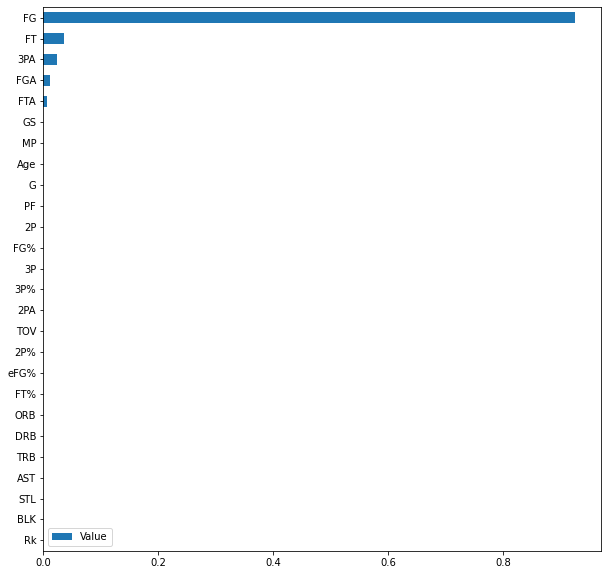

In [ ]:
sorted = perm_importance.importances_mean.argsort()

data = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
data.plot.barh(figsize = (10,10))

<Axes: xlabel='PTS', ylabel='FG'>

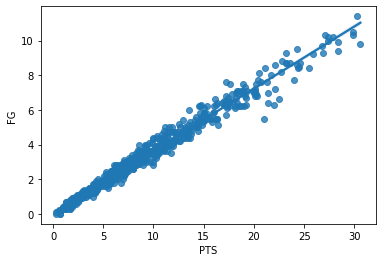

In [ ]:
sns.regplot(data = dataset, x = 'PTS', y = 'FG')

#Insights:
- Factors such as TOV, MP, FTA, FT, 2P, 2PA, FG, FGA have massive impact on PTS in NBA Players 2020, especially FG 98%.
- NBA club should have more attention on those factors that can increase PTS in every players like give more budgets on those important factors.